In [1]:
%matplotlib inline

import os
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib.pyplot import rc_context

sys.path.append('../../../Code/')

from utils import read_dataset_log
from starcat import starCAT
import matplotlib.colors

In [173]:
figdir = '../../../Figures/Components'

In [4]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

dataset                                           usage_fn  \
dataset                                                                       
AMP-RA            AMP-RA  /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer    Pan-Cancer  /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU                TBRU  /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid        UK-Covid  /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT            COMBAT  /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue    Pan-Tissue  /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks            Sparks                                                NaN   
Stimseq          Stimseq                                                NaN   

                                                gene_scores_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer   /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU         /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid     /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT       /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue   /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                                   gene_tpm_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer   /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU         /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid     /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT       /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue   /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                                       tcat_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Cancer   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
TBRU         /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
HIV-Vaccine  /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
UK-Covid     /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
COMBAT       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Tissue   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Sparks       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Stimseq      /data/srlab1/TCAT/Data/PerDataset/Stimseq/TCAT...   

                                        tcat_fn_withsingletons  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Cancer   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
TBRU         /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
HIV-Vaccine  /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
UK-Covid     /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
COMBAT       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Tissue   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                                     scores_fn  \
dataset                                                          
AMP-RA                                                     NaN   
Pan-Cancer                               

In [5]:
dataset = 'AMP-RA'

In [6]:
adata = sc.read(params.loc[dataset, 'raw_counts_fn'])

Only considering the two last: ['.ADTfixed', '.h5ad'].
Only considering the two last: ['.ADTfixed', '.h5ad'].


In [13]:
cgep_info = read_dataset_log('cGEP_Name')
name_map = dict(zip(cgep_info['cGep_Name'], cgep_info['Short_Name']))

In [75]:
meta = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t')
usage = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t')
usage.columns = usage.columns.map(name_map)

In [76]:
usage_norm = usage.div(usage.sum(axis=1), axis=0)

In [21]:
cat = starCAT(reference='TCAT.V1', cachedir='../../../Data/Misc/cache')

Using reference from starCAT database
Loading reference from existing cache file for reference TCAT.V1


In [22]:
cat.usage = usage
cat.usage_norm = usage.div(usage.sum(axis=1), axis=0).copy()
scores = cat.compute_addon_scores()

/data/srlab1/mcurtis/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
ncol = 6
nrow = len(usage.columns)//ncol + 1

In [71]:
usage.columns

Index(['Translation', 'MALAT1', 'CD8_EM', 'IEG', 'YPEL5/CREM', 'CD4-Naive',
       'IEG-Tissue', 'Tfh', 'Cytoskeleton', 'Cytotoxic',
       'AMP-RA:Doublet_Fibroblast_Single', 'Th17', 'S100A10/LMNA', 'Treg',
       'HeatShock2', 'Tph', 'CD8/KLRC2', 'gdT', 'MAIT', 'HeatShock1',
       'EBI3-Activation', 'AMP-RA:SERPINE2_Single', 'ISG',
       'AMP-RA:Doublet_Plasma_Single', 'HLA', 'High-Cytokine', 'CellCycle-S',
       'CellCycle-Histone', 'IL10/CD38', 'AMP-RA:Hypoxia_Single',
       'CellCycle-G2M', 'Doublet-Bcell', 'AMP-RA:Doublet_Mast_Single',
       'Doublet-RBC'],
      dtype='object')

In [24]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["whitesmoke","#758cff"])
ncol = 2
nrow = 2

In [30]:
geps = ['Translation', 'Treg']

In [73]:
import random

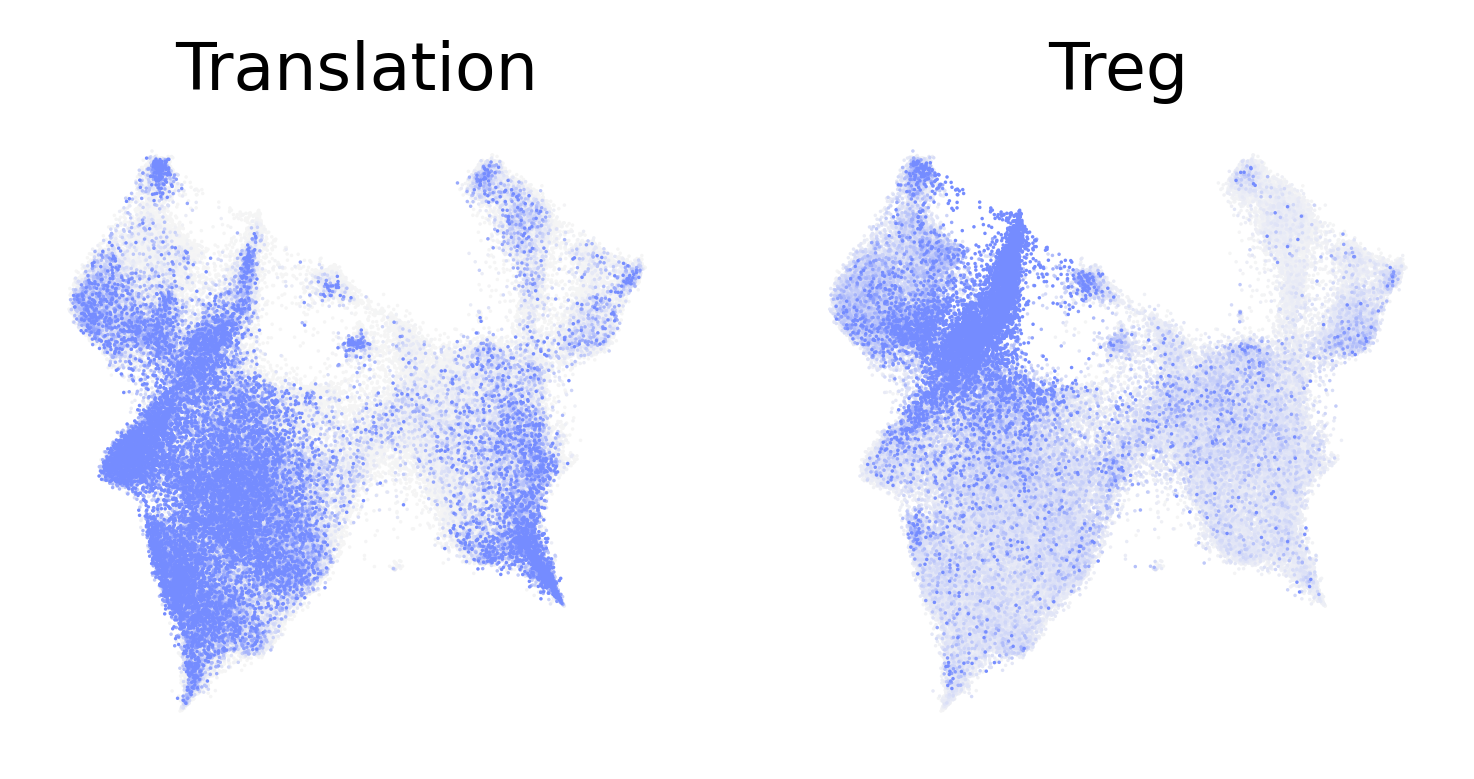

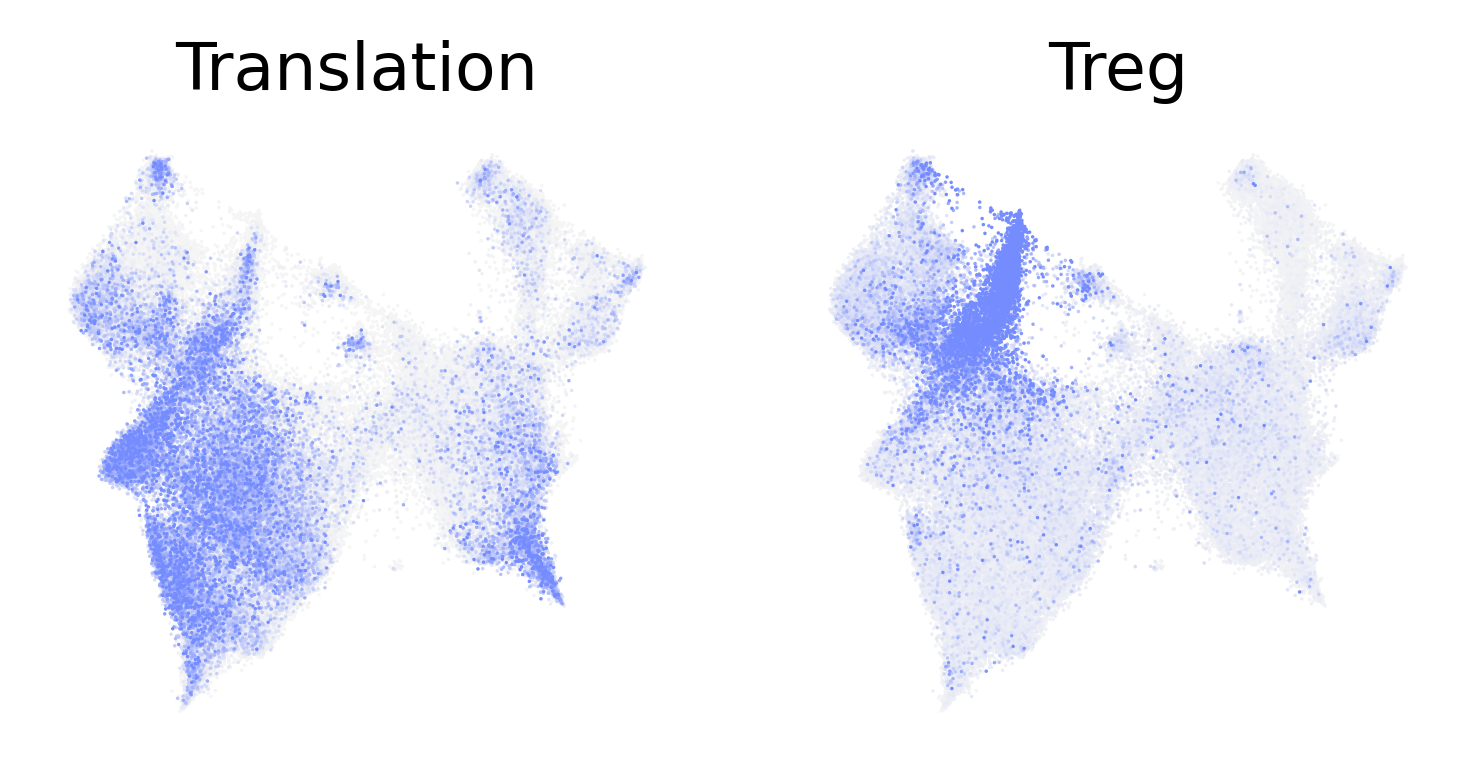

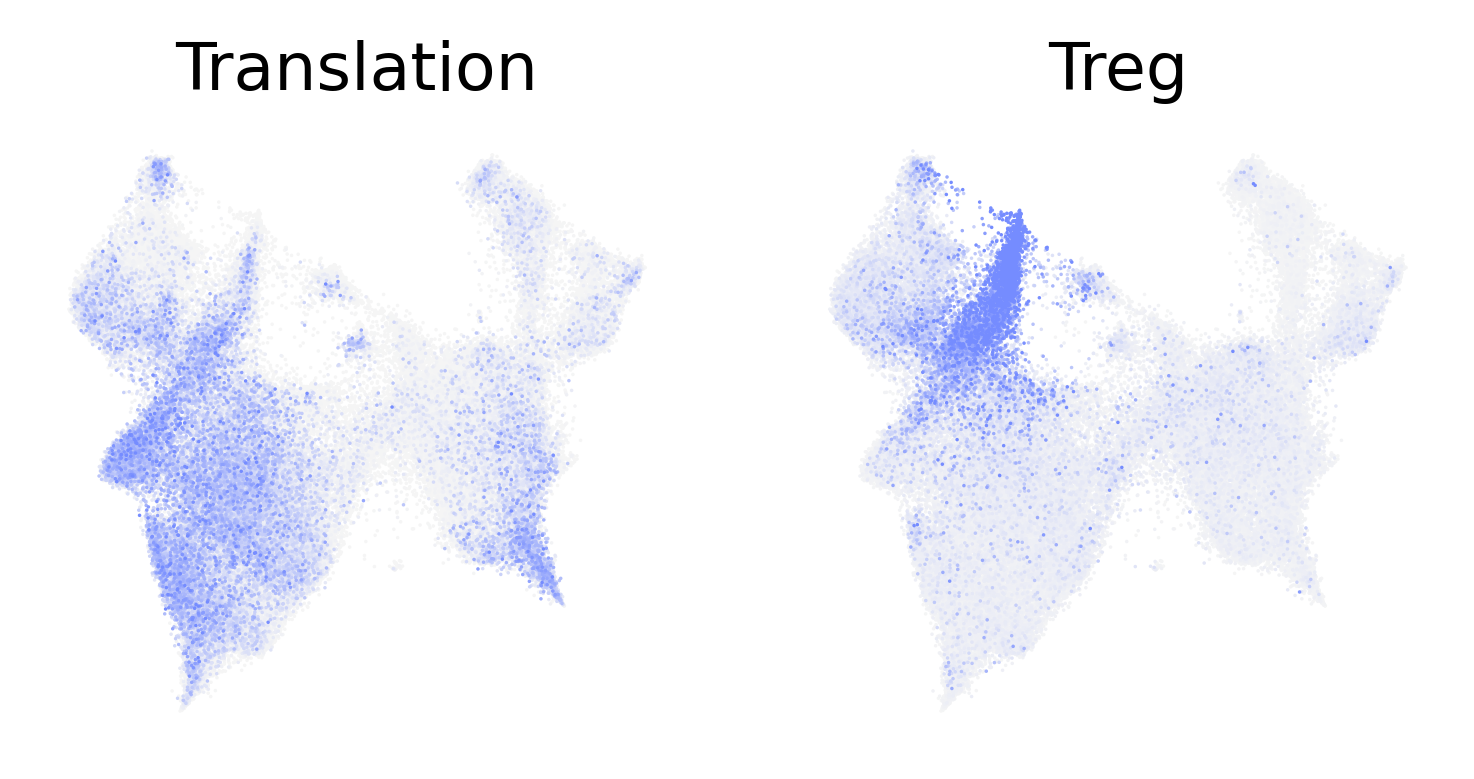

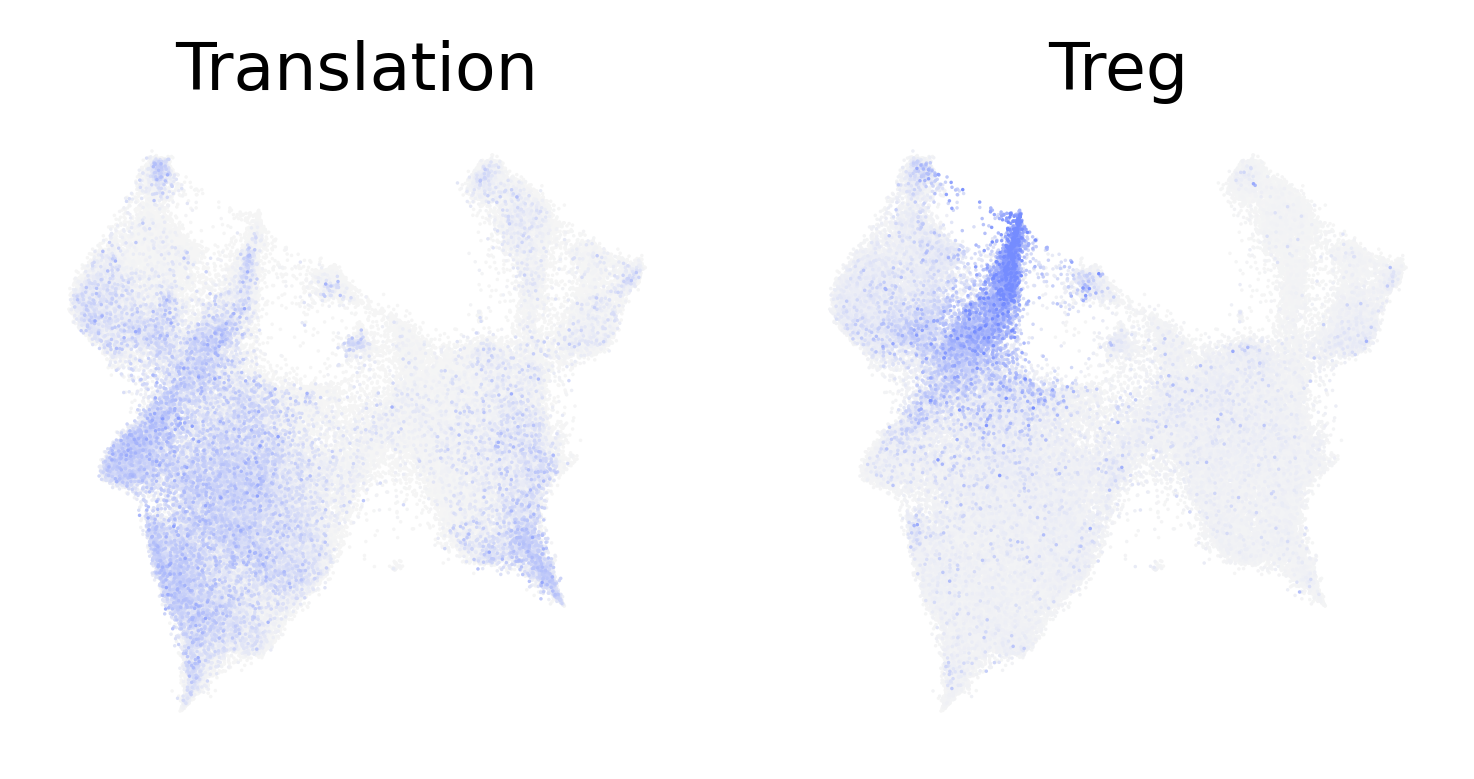

In [85]:
vmax = 0.5
for vmax in [0.1, 0.2, 0.3, 0.5]:
    fig, ax = plt.subplots(nrows = 1, ncols = ncol, figsize = (4.5, 2), dpi = 400)
    for n, gep in enumerate(geps):
        i = n // ncol
        j = n % ncol
        order = usage_norm[gep].sort_values().index
        # order = usage_norm.sample(usage_norm.shape[0]).index
        ax[j].scatter(x = meta.loc[order, 'UMAP1'], 
                      y = meta.loc[order, 'UMAP2'], s = .4, 
                      c = usage_norm.loc[order, gep],
                        vmin=0, vmax = vmax, edgecolors='none',
                         cmap = cmap
                        )
        ax[j].set_xticks([])
        ax[j].set_yticks([])
        ax[j].set_title(gep)
        
        for spine in ['top', 'right', 'left', 'bottom']:
            ax[j].spines[spine].set_visible(False)
    
    plt.show()


In [88]:
scores['Multinomial_Label']

BRI-399_AAACGAATCTGCATGA        CD4_CM
BRI-399_AAACGCTTCCTTGACC     CD8_Naive
BRI-399_AAAGGGCAGCCGGAAT          Treg
BRI-399_AAAGGGCCACTATGTG     CD8_TEMRA
BRI-399_AAAGGTAGTGCAGGAT          Treg
                               ...    
BRI-637R_TGGTACAGTTACCCAA       CD4_EM
BRI-637R_TGTCAGACAACGGCTC       CD4_CM
BRI-637R_TTCCAATAGGTACCTT       CD4_EM
BRI-637R_TTCGGTCCAGCAGTAG       CD8_CM
BRI-637R_TTTGTTGTCTAGTGAC       CD8_CM
Name: Multinomial_Label, Length: 94048, dtype: object

In [96]:
gating_cmap = {'CD4_CM': '#1f77b4',
 'CD4_EM': '#ff7f0e',
 'CD4_Naive': '#279e68',
 'CD4_TEMRA': '#d62728',
 'CD8_CM': '#aa40fc',
 'CD8_EM': '#8c564b',
 'CD8_Naive': '#e377c2',
 'CD8_TEMRA': '#b5bd61',
 'DN': '#17becf',
 'DP': '#aec7e8',
 'MAIT': '#ffbb78',
 'Treg': '#98df8a',
 'gdT': '#ff9896'}


In [171]:
pastel_cmap_dict = {
    'CD4_CM': '#4fa3e1',  # Brighter blue
    'CD4_EM': '#ff9e1a',  # Brighter orange
    'CD4_Naive': '#00997d',  # Brighter green
    'CD4_TEMRA': '#e65b5f',  # Brighter red
    'CD8_CM': '#c56bff',  # Brighter purple
    'CD8_EM': '#b29170',  # Brighter brown
    'CD8_Naive': '#e9aaff',  # Brighter pink
    'CD8_TEMRA': '#ffe59a',  # Brighter olive green
    'DN': '#6bd7e5',  # Brighter cyan
    'DP': '#b4c8f2',  # Brighter light blue
    'MAIT': '#ffd39b',  # Brighter peach
    'Treg': '#94c47d',  # Brighter light green
    'gdT': '#fdb4b2',  # Brighter light red
}



0 0 0
1 0 1
2 1 0


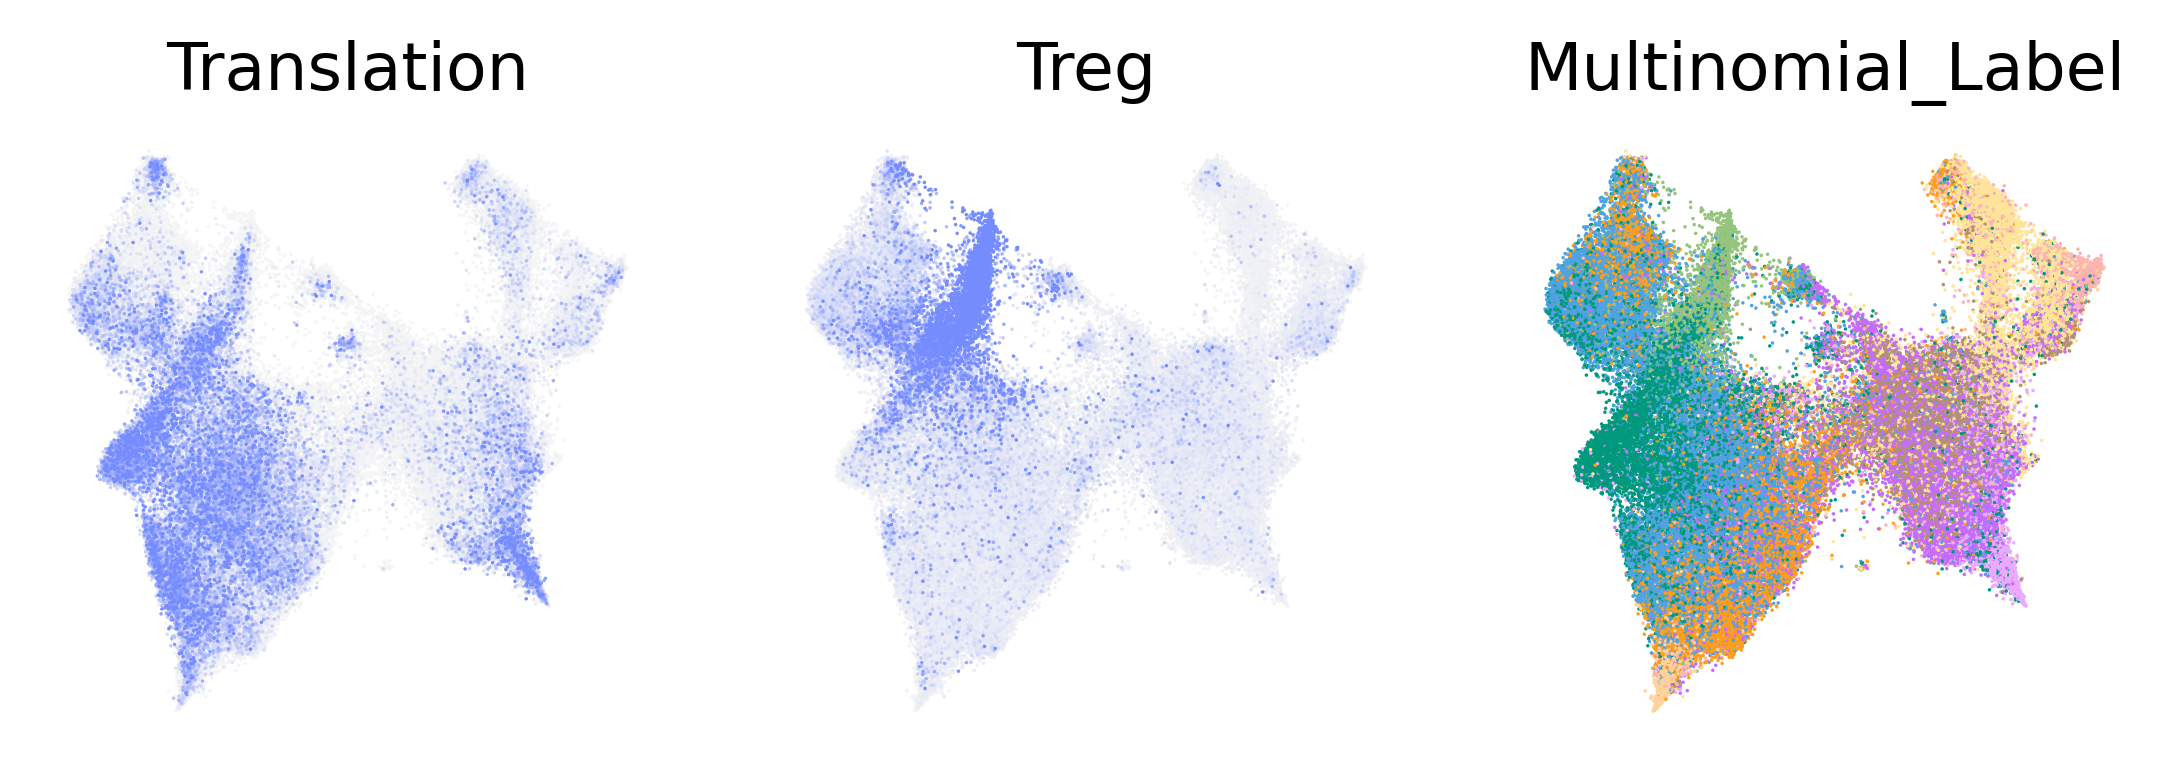

In [174]:
vmax = 0.2
# for vmax in [0.1, 0.2, 0.3, 0.5]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (4.5/2*3, 2), dpi = 400)
for n, gep in enumerate(geps + ['Multinomial_Label']):
    i = n // ncol
    j = n % ncol
    ax = axes[n]
    print(n, i, j)

    if gep != 'Multinomial_Label':
        order = usage_norm[gep].sort_values().index
        # order = usage_norm.sample(usage_norm.shape[0]).index
        ax.scatter(x = meta.loc[order, 'UMAP1'], 
                      y = meta.loc[order, 'UMAP2'], s = .4, 
                      c = usage_norm.loc[order, gep],
                        vmin=0, vmax = vmax, edgecolors='none',
                         cmap = cmap
                        )
    else:
        ax.scatter(x = meta.loc[:, 'UMAP1'], 
                      y = meta.loc[:, 'UMAP2'], s = .4, 
                      c = scores.loc[:, gep].map(pastel_cmap_dict), edgecolors='none',
                        )

    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(gep)
    
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
fig.savefig(os.path.join(figdir, 'Schematic_UMAP.AMPRA.png'), bbox_inches="tight")
fig.savefig(os.path.join(figdir, 'Schematic_UMAP.AMPRA.pdf'), bbox_inches="tight")

plt.show()
